In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
census=pd.read_csv(r'C:\Users\gowta\OneDrive\Desktop\Data Science\assignment\Logistics-Regression-Assignment\census-income .csv')
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [87]:
census.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [88]:
census=census.replace('?',np.NaN)

In [89]:
census.shape

(32561, 15)

In [90]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [91]:
census.annual_income.value_counts()

<=50K    24720
>50K      7841
Name: annual_income, dtype: int64

In [92]:
census.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

# 1. How many types of occupations do we have?
>a. 13

>b. 14

>c. 15

>d. 11

>Ans: b. 14

In [93]:
census.occupation.value_counts().count()

14

# 2. How many people are working as tech support and have an annual income greater than 50k?
>a. 278

>b. 389

>c. 289

>d. 934

>Ans: a. 278

In [94]:
census.loc[(census.occupation=='Tech-support')&(census.annual_income==">50K")].value_counts().count()

278

# 3. How many total missing values are present in the dataset?
>a. 4262

>b. 5000

>c. 5349

>d. 4302

>Ans: a. 4262

In [95]:
census.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

# 4. If there are missing values in the Marital Status column, which option among the following should be used for replacing the missing values:
>a. Mean

>b. Median

>c. Mode

>d. All of the above

>Ans: c. Mode

# 5. How many people are having private work classes and are not from the United States of America?
>a. 2151

>b. 2300

>c. 2000

>d. 2190

In [96]:
room=census[(census['workclass']=='Private')&(census['native-country'] != "United-States")].value_counts().count()
room

2145

In [97]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 6. How many people are either having Annual Income(last column) less than or equal to 50k or their working hours is greater than or equal to 40 hrs:
>a. 23008

>b. 23448

>c. 29505

>d. 25903

In [98]:
census[(census['hours-per-week']>=40) | (census['annual_income'] == "<=50K")].value_counts().count()

29482

# 7. Which of the following methods can you use for handling outliers?
>a. Interquartile Range(IQR) Method

>b. Z Score method

>c. Both of the above methods

>d. None of the above

>Ans: c. Both of the above methods

# 8. Chi-square is used to analyze:
>a. Determine the relationship b/w the variables

>b. Compare observed results with expected results

>c. both a and b

>d. None of the above

>Ans: b. Compare observed results with expected results

# 9. What is VIF?
>a. It can detect multicollinearity

>b. If the VIF value is greater than 10, then there is no correlation between
the independent variables

>c. It stands for Variance Impact Factor

>d. VIF is when there is no correlation between one predictor and the other
predictors in a model.

>Ans: a. It can detect multicollinearity

# 10.What predict_proba will tell you?
>a. It will predict the class probabilities

>b. It will tell you the target value

>c. Both are correct

>d. None of the above

>Ans: a. It will predict the class probabilities

# 11.Logistic regression is useful for regression problems:
>a. True

>b. False

>Ans: b. False

# 12.In logistic regression, if the predicted logit is 0, what’s the transformed probability?
>a. 0.5

>b. 0.05

>c. Both of the above

>d. None of the above

>Ans: a. 0.5

# 13.Which variant of logistic regression is recommended when you have a categorical dependent variable with more than two values?

>a. Multiple Logistic regression

>b. Multinomial logistic regression

>c. Ordered logit regression

>d. Poisson regressionb

>Ans: b. Multinomial logistic regression

# Perform the following tasks for answering the remaining questions
>● Rename the last column as Annual Income

>● Remove the missing values from the dataset

>● Change the labels of categorical data into numerical data using Label
Encoder.

>● Split the dataset into a train and test of proportions 70:30 and set the random
state to 0.

>● Build a Logistic Regression Model on the data.

Answer the following questions with the help of the above-created model.

In [99]:
census.rename(columns = {'annual_income' : 'Annual Income'}, inplace = True)

In [100]:
census.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Annual Income        0
dtype: int64

In [101]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Annual Income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [102]:
census=census.dropna()

In [103]:
census.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Annual Income     0
dtype: int64

In [104]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  Annual Income   30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<AxesSubplot:xlabel='workclass'>

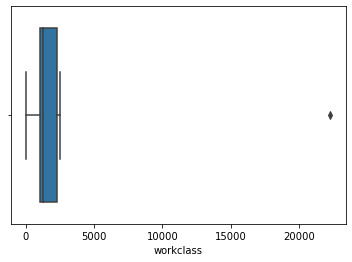

In [105]:
sns.boxplot( data = census,x = census["workclass"].value_counts())

<AxesSubplot:xlabel='occupation'>

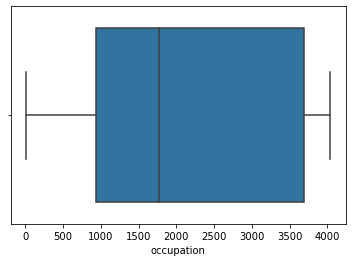

In [106]:
sns.boxplot( data = census,x = census["occupation"].value_counts())

<AxesSubplot:xlabel='native-country'>

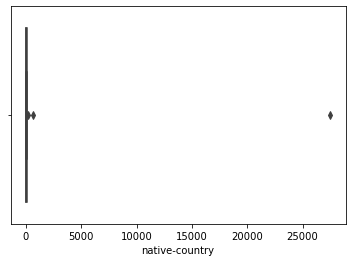

In [107]:
sns.boxplot( data = census,x = census["native-country"].value_counts())

In [108]:
col_list = list(census.columns)

In [109]:
col_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Annual Income']

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
encoder = LabelEncoder()

In [112]:
census['workclass'] = encoder.fit_transform(census['workclass'])
census['education'] = encoder.fit_transform(census['education'])
census['marital-status'] = encoder.fit_transform(census['marital-status'])
census['occupation'] = encoder.fit_transform(census['occupation'])
census['relationship'] = encoder.fit_transform(census['relationship'])
census['race'] = encoder.fit_transform(census['race'])
census['sex'] = encoder.fit_transform(census['sex'])
census['native-country'] = encoder.fit_transform(census['native-country'])

In [113]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [114]:
x = census.drop(['Annual Income'],axis = 1)
y = census['Annual Income']

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [116]:
x_train.shape,y_train.shape

((21113, 14), (21113,))

In [117]:
model = LogisticRegression()

In [118]:
model.fit(x_train,y_train)

C:\Users\gowta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
y_pred = model.predict(x_test)

In [120]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       <=50K       0.79      0.98      0.88      6764
        >50K       0.80      0.24      0.37      2285

    accuracy                           0.79      9049
   macro avg       0.80      0.61      0.62      9049
weighted avg       0.79      0.79      0.75      9049



In [121]:
confusion_matrix(y_test,y_pred)

array([[6627,  137],
       [1739,  546]], dtype=int64)

In [122]:
accuracy_score(y_test,y_pred)

0.7926842745054702

In [126]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, pos_label='>50K', average='binary')

(0.7994143484626647, 0.23894967177242887, 0.3679245283018867, None)

In [127]:
6627/(6627+546)

0.9238812212463404

In [128]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test,y_pred,pos_label='<=50K')))


Precision score: 0.7921348314606742


# 14.What is the accuracy score of the above model?
>a. 0.60 to 0.70

>b. 0.40 to 0.60b

>c. 0.70 to 0.85

>d. None of the above

>Ans: c. 0.70 to 0.85

# 15.What is the specificity of the above model?
>a. 0.20 to 0.30

>b. 0.30 to 0.40

>c. 0.50 to 0.60

>d. None of the above

>Ans: d. None of the above

# 16.What is the model’s precision when the target is False?
>a. 0.60 to 0.70

>b. 0.40 to 0.60

>c. 0.70 to 0.80

>d. None of the above

>Ans: c. 0.70 to 0.80

# 17.What is the total support value from the above model?
>a. 9049

>b. 9032

>c. 10000

> a. 9049

# 18.What is the f1 score of the above model when the target is True?
>a. 0.30 to 0.40

>b. 0.40 to 0.50

>c. 0.60 to 0.70

>d. 0.90 to 0.99

>Ans: a. 0.30 to 0.40

# 19.How many records are correctly classified by the model?
>a. 7173

>b. 7043

>c. 7000

>d. None of the above

>Ans: a. 7173